In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [131]:
df = pd.read_csv('Final.csv')
df

,Unnamed: 0,Policy Number,Insured's Name,Starting Date of Insurance,Ending Date of Insurance,Days Remaining,Receipt Number,Previous Insurer,Previous Policy Number,Type of CommercialVehicles:,...,(-)Calculated NCB Discount(20%),(+)Additional Loading on OD Premium,Total OD Premium (Rs),Basic TP Premium,(+)LL to paid driver conductor cleaner employed for oprn,(+)LL to persons employed for opn and/or maint.and/or loading and/or unloading,Total TP Premium (Rs),Net Premium (Rs),GST (Rs),Total Payable (Rs)
0,0,46080331210100001189,RAJ BAHORAN CHAUDHARY .,26/08/2021,25/08/2022,0.0,10000089210800592356 -25/08/21,Not available,.,A - Goods Carrying,...,0.00,-12.0,1261.0,15746.0,100.0,50.0,15896.0,17157.0,2144.0,19301.0
1,1,46080031210100001060,MR JAMEEL AHMAD .,20/05/2021,19/05/2022,0.0,10000089210500401827 -20/05/21,THE NEW INDIA ASSURANCE COMPANY LTD.,46080031200100000395,A - Goods Carrying,...,0.00,0.0,2260.0,43037.0,100.0,0.0,43137.0,45397.0,5588.0,50985.0
2,2,46080031210200001070,MR JAMIL AHMAD .,22/05/2021,21/05/2022,0.0,10000089210500420176 -21/05/21,THE NEW INDIA ASSURANCE COMPANY LTD.,46080031200200000244,A - Goods Carrying,...,0.00,0.0,0.0,15746.0,100.0,0.0,15846.0,15846.0,1908.1,17754.1
3,3,46080031210100001305,JAMEEL AHMED .,31/05/2021,30/05/2022,0.0,10000089210500631643 -30/05/21,THE NEW INDIA ASSURANCE COMPANY LTD.,46080031200100001543,A - Goods Carrying,...,823.46,0.0,3294.0,43037.0,100.0,250.0,43387.0,46681.0,5820.0,52501.0
4,4,46080031210100001313,MR. SAMIM AHMAD,31/05/2021,30/05/2022,0.0,46080081210000001307 -30/05/21,THE NEW INDIA ASSURANCE COMPANY LTD.,46080031200100001542,A - Goods Carrying,...,785.51,0.0,3143.0,43037.0,100.0,0.0,43137.0,46280.0,5748.0,52028.0


## Shows Relationship between Name and Total Pay

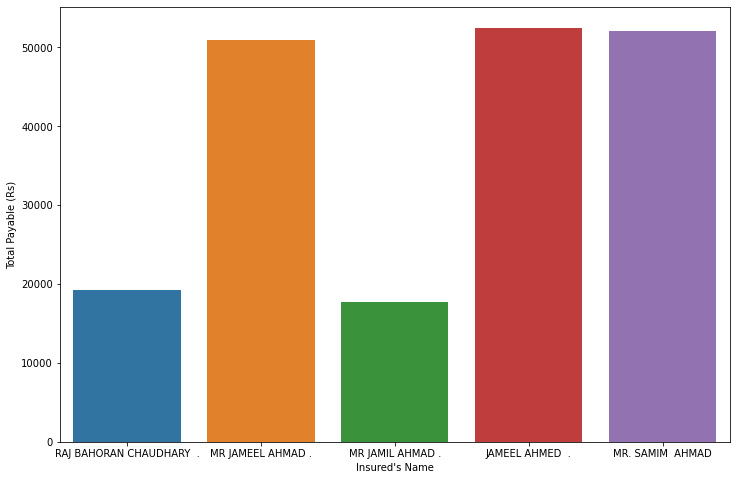

In [132]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x = 'Insured\'s Name',y = 'Total Payable (Rs)',data = df, ax=ax)
plt.show()

#### We can see here Jameel Ahmed has paid highest for the Insurance Policy

## We will compare whether the Insurer has taken Insurance before or not

In [133]:
inf = []
for i in df['Previous Insurer'].values:
    if i != 'Not available':
        inf.append(1)
    else:
        inf.append(0)
df['inf'] = inf

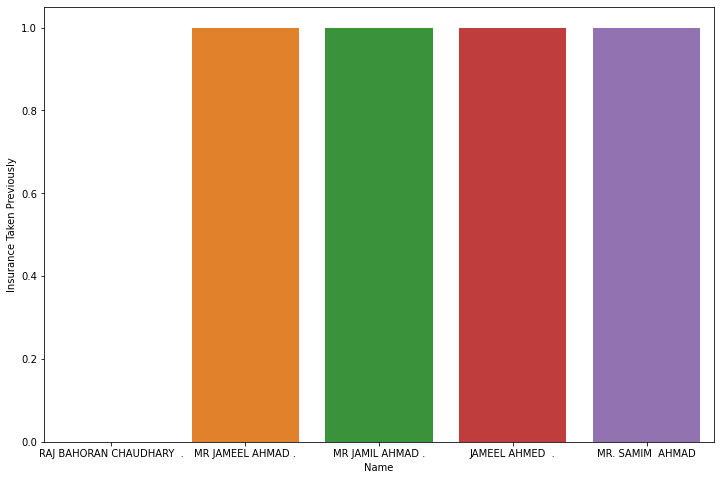

In [134]:
# fig = plt.figure(figsize = (12, 8))
# plt.bar(df['Insured\'s Name'], inf)
# plt.xlabel("Insured\'s Name'")
# plt.title("Insurance Taken Before or Not")
# plt.show()
fig, ax = plt.subplots(figsize=(12, 8))
graph = sns.barplot(x = 'Insured\'s Name', y = 'inf', data = df, ax=ax)
graph.set(xlabel='Name', ylabel='Insurance Taken Previously')
plt.show()

#### Thus, we can see that only Raj has not taken insurance before

## Vehicle Type vs Amount Payed

In [135]:
pay = df['Total Payable (Rs)'].values

In [136]:
lst = []
for i in df['Make/Model:'].values:
    if 'SFC' in i:
        lst.append('Small Size')
    elif 'LPT' in i:
        lst.append('Large Size')
    else:
        lst.append('Medium Size')
df['Vehicle Type'] = lst

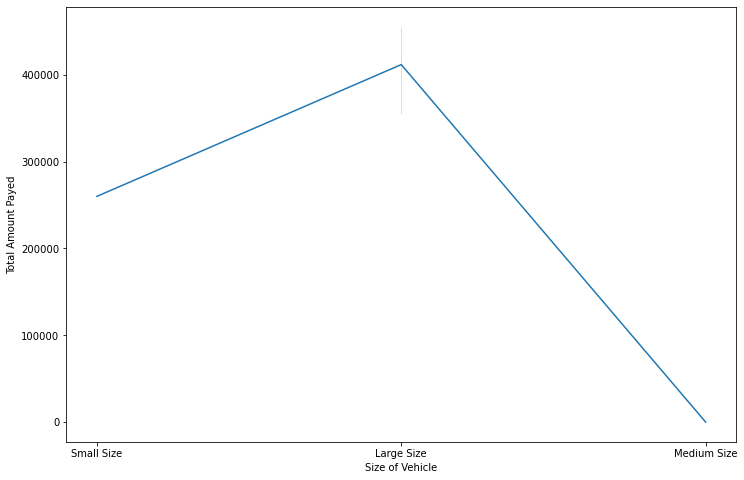

In [175]:
fig, ax = plt.subplots(figsize=(12, 8))
graph = sns.lineplot(x = 'Vehicle Type', y = 'Insured Declared Value (Rs)', data = df, ax=ax)
graph.set(xlabel='Size of Vehicle', ylabel='Total Amount Payed')
plt.show()

#### We can see here that Large Vehicle tends to pay more Insurance Amount

## Manufacture Year vs Insure Declared Value

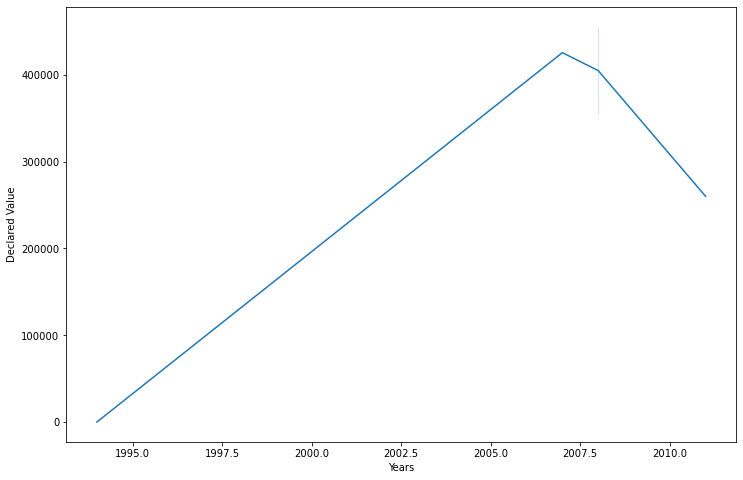

In [138]:
fig, ax = plt.subplots(figsize=(12, 8))
graph = sns.lineplot(x = 'Year of manufacture:', y = 'Insured Declared Value (Rs)', data = df, ax=ax)
graph.set(xlabel='Years', ylabel='Declared Value')
plt.show()

#### We can see that as the vehicle gets old the Declared Value decreases

## Weight vs OD Premium

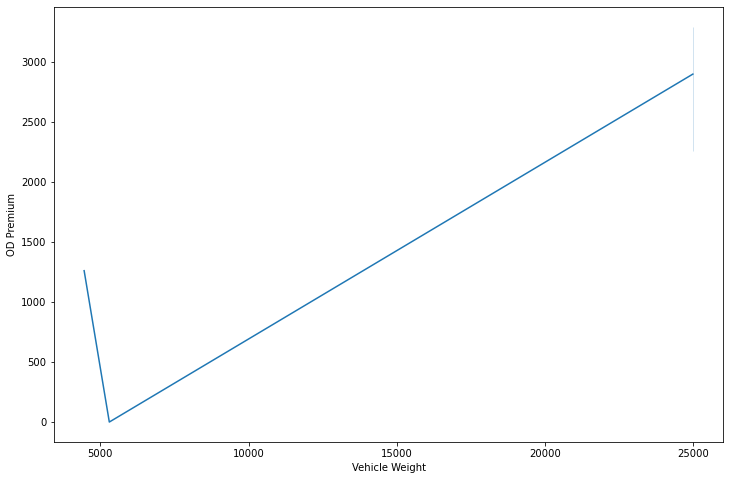

In [139]:
fig, ax = plt.subplots(figsize=(12, 8))
graph = sns.lineplot(x = 'Gross Vehicle Weight(GVW):', y = 'Total OD Premium (Rs)', data = df, ax=ax)
graph.set(xlabel='Vehicle Weight', ylabel='OD Premium')
plt.show()

#### We can see that as the Weight of Vehicle increases, the OD Premium price also increases

## Previous Insurance Analysis

### Here we will check that which Insurance Company Policy has been choosen the most

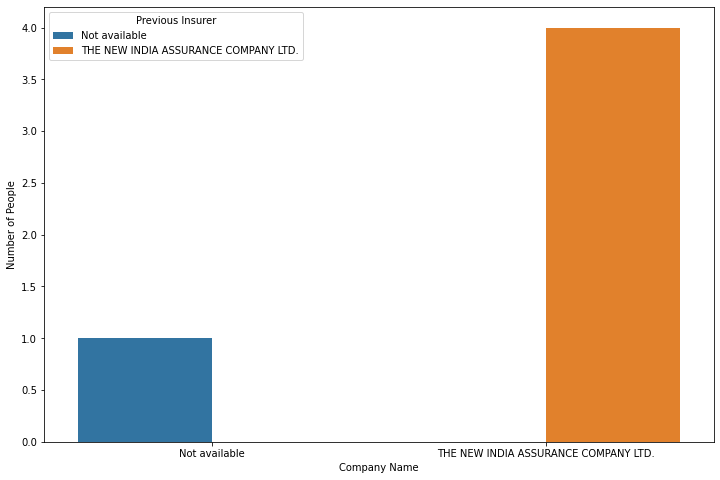

In [150]:
fig, ax = plt.subplots(figsize=(12, 8))
graph = sns.countplot(x = 'Previous Insurer',hue='Previous Insurer', data = df, ax=ax)
graph.set(xlabel='Company Name', ylabel='Number of People')
plt.show()

#### We can see that People mainly go for THE NEW INDIA ASSURANCE COMPANY LTD.

## Which Registration Authority People choose

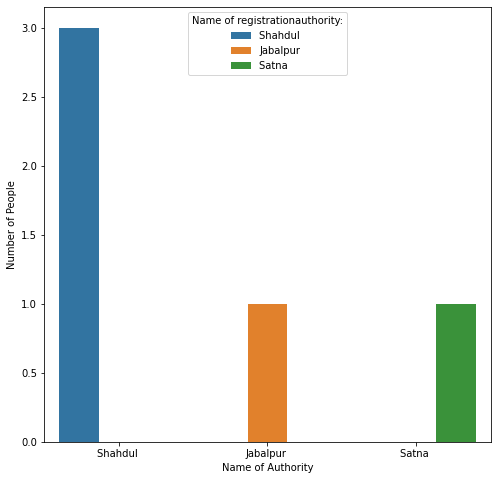

In [155]:
fig, ax = plt.subplots(figsize=(8, 8))
graph = sns.countplot(x = 'Name of registrationauthority:',hue='Name of registrationauthority:', data = df, ax=ax)
graph.set(xlabel='Name of Authority', ylabel='Number of People')
plt.show()

#### Here we can see that People mainly get Insurance from Shahdul

In [163]:
ncb = []
for i in (df['(-)Calculated NCB Discount(35%)']+df['(-)Calculated NCB Discount(20%)']).values:
    if i == 0:
        ncb.append(0)
    else:
        ncb.append(1)
df['ncb'] = ncb

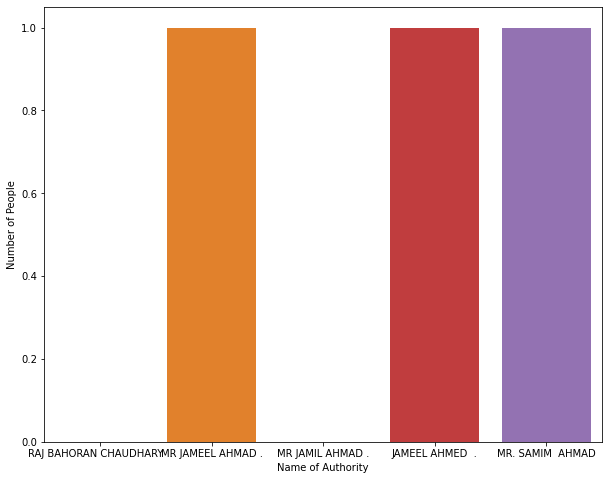

In [170]:
fig, ax = plt.subplots(figsize=(10, 8))
graph = sns.barplot(x = 'Insured\'s Name', y='ncb', data = df, ax=ax)
graph.set(xlabel='Name of Authority', ylabel='Number of People')
plt.show()